## Simple Linear Regression Neural Networks

In [25]:
#README

# Simple Linear Regression Neural Networks using Numpy

# we will build the model, generate and feed it random data and then train the model. We expect the Machine Learning Algoritm to 
# learn the underline relationship of the data. The objective function and the optimization Algorithm were also addressed 
# in this notebook.

## README
    # Increasing the number of observations (e.g. to 100,000) did not make difficult the learning processs of the algorithm as 
    #it gave about the same loss for the iterations as compared with the initial 1000 observations but it took more time to run.
    # Reducing the Learning rate to Values like 0.005, 0.0005 reduces the time needed for the loss to converge or to be 
    #minimized to zero. And so the Learning rate is inversely proportional to the numbers of iterations because more iterations 
    #will be required to get minimum loss.


We will build the model and feed it data. We expect the algorithm to learn the underline relationship of the data

### import the relevant Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Generate random inputs to train on
we will create fake data with a linear relationship, in real life we will load the data

In [16]:
observation = 1000
# we are creating a two variable model that will be called a and b

#the below are the two input variables we will feed into the algorithm
a = np.random.uniform(low = -10, high = 10, size = (observation, 1))
b = np.random.uniform(-10,10,(observation, 1))

#we will combine them in one variable "var"
var = np.column_stack((a,b))

print(var.shape)

(1000, 2)


### Elements of the Model in a Supervised Learning

inputs, weights, bias, outputs, targets

### Create the Target we will aim at

$targets = f(a,b) = 2a - 3b + 5 +noise$

The algorithm must learn that this is the function,  
the weights are 2 and -3,the bias is 5, if we don't get that at the end, we haven't worked correctly

The noise is introduced to randomize our data

In [17]:
noise = np.random.uniform(-1, 1, (observation, 1))

targets = 2*a - 3*b + 5 + noise

In [18]:
noise

array([[-4.94493990e-02],
       [-2.76034285e-01],
       [ 6.32524634e-01],
       [-6.16951547e-01],
       [-5.86763796e-01],
       [-2.96386222e-01],
       [-3.44728576e-01],
       [-7.06459220e-01],
       [-8.69330798e-01],
       [ 9.66144678e-01],
       [ 9.51262934e-01],
       [ 2.55477143e-01],
       [ 5.74527368e-01],
       [-4.91462432e-04],
       [ 3.88697441e-01],
       [-1.06952444e-01],
       [ 5.88683602e-01],
       [-9.00760771e-02],
       [ 1.41812247e-01],
       [ 4.48162255e-01],
       [-7.16247293e-01],
       [ 8.00982185e-01],
       [ 6.75250744e-02],
       [-4.84781659e-01],
       [ 4.74952413e-01],
       [ 4.51475040e-01],
       [-2.38424586e-01],
       [-9.43524738e-01],
       [ 3.68802938e-01],
       [ 4.08362924e-01],
       [ 7.16672118e-01],
       [ 9.25458715e-01],
       [ 2.77452891e-01],
       [ 2.35017339e-01],
       [-1.27863434e-01],
       [ 7.92399612e-01],
       [-4.66829243e-01],
       [-4.14404826e-01],
       [ 3.6

In [19]:
targets.shape

(1000, 1)

### Initiate Variables

In [20]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size = (2,1))
bias = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(bias)

[[ 0.09685233]
 [-0.07332468]]
[-0.01743828]


### Select a learning rate that is ok for the speed of optimization

In [21]:
learning_rate = 0.05

###### So now we have inputs, targets, and arbitrary numbers for weights and biases. we are left with Training the model (varying the weights and biases so our outputs are closer to our targets)

### Training the Model
###### Since it is an iterative issue, we will create a loop that will apply our update rule and calculate the loss function

**We plan to:**

calculate outputs, compare outputs to targets through loss, print loss, and adjust weights and biases

And so at the next iteration, the updated weights and bias will provide different outputs and the procedure will be repeated

In [22]:
for i in range(100):
    outputs = np.dot(var, weights) + bias
    deltas = outputs - targets
    
    # We printed the loss to check if it is decreasing as our iterations are performed. 
    #If it is, our ML algorithm is functioning well
    loss = np.sum(deltas**2) / 2 / observation
    # which is the loss/observation or mean loss
    # the inclusion of the division by 2 makes the learning independent of the number of observations
    print(loss)
    deltas_scaled = deltas / observation
    
    # For the updated/new weights
    weights = weights - learning_rate * np.dot(var.T, deltas_scaled)
    # we had to transpose the inputs (var) because its shape is 1000*2 and that of deltas_scaled, 1000*1
    # And so, we cannot directly multiply
    
    # For the updated/new bias
    bias = bias - learning_rate * np.sum(deltas_scaled)

210.13003715383164
92.16459286423509
43.41702032597736
22.97153241309622
14.127864193273767
10.066718468103751
8.000941843942073
6.7890398161653795
5.9613974602174435
5.322916574848557
4.790846578083548
4.328583006915458
3.918626096054126
3.5515204324050518
3.2213178598777
2.923704375108721
2.655216118815366
2.4129016622034616
2.1941681241419873
1.9967038590877988
1.818433799146075
1.6574893940554447
1.5121856578922492
1.3810021541043922
1.2625665251652505
1.1556399070597931
1.0591038771281265
0.9719487175853687
0.8932628388451476
0.822223238509364
0.7580868907183809
0.7001829735505708
0.6479058522573331
0.6007087445685779
0.5580980016593776
0.5196279448983282
0.4848962043481811
0.4535395102523229
0.4252298934847703
0.3996712552213008
0.37659626995216683
0.3557635894437954
0.33695531840472975
0.3199747354530076
0.30464423554786096
0.2908034723649992
0.27830768118602073
0.26702616476053964
0.25684092630421024
0.24764543533475278
0.2393435134374971
0.23184832830632213
0.22508148553836527

### Printing weights and bias to check if we have worked correctly

In [23]:
print(weights, bias)

[[ 2.00037349]
 [-3.0014073 ]] [5.00293631]


### A learning rate of 0.2 initiated caused oscillation (it was diverging to infinity) so it was changed to 0.05

### Plot of the outputs of the last iteration against the Targets

Text(0, 0.5, 'Targets')

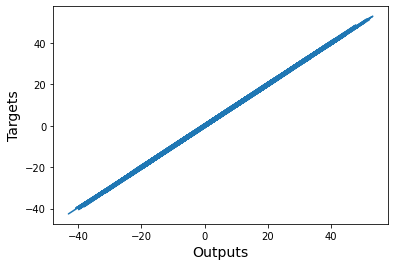

In [24]:
plt.plot(outputs, targets)
plt.xlabel('Outputs', size = 14)
plt.ylabel('Targets', fontsize = 14)